### Esercizi con PIP

In [51]:
from PIL import Image, ImageOps
from os import path

In [52]:
def ask_path():
        user_input = input("Inserisci il path dell'immagine: ")
        
        url, extension = path.splitext(user_input)
        extension = extension.lower()
        
        if extension in [".jpg", ".png"]:
            if path.isfile(user_input):
                return [user_input, url, extension]
            else:
                print("Il File non esiste nel path inserito")        
        else:
            print("L'estensione del file specificato non è gestita") 

In [53]:
def image_info(image, file_path):
    file_fullname = path.basename(file_path)
    name, extension = path.splitext(file_fullname)

    print(f"Nome dell'immagine: {name}")
    print(f"Estensione dell'immagine: {extension}")
    print(f"Risoluzione dell'immagine: {image.size}")

In [54]:
def check_res_diff(w1, h1, w2, h2):
    if (float(w1) / float(h1)) != (float(w2) / float(h2)):
        return True
    else:
        return False

In [55]:
def ask_change_res():
    while True:
        try:
            user_choice = input("Vuoi mantenere le proporzioni originali? (y/n): ")
            user_choice.lower()
            assert user_choice in ["y", "n"], "Non hai inserito un valore corretto"
            return user_choice
        except AssertionError as e:
            print(e)

In [56]:
def ask_change_filter():
    while True:
        try:
            user_choice = input("Vuoi applicare un filtro b/n? (y/n): ")
            user_choice.lower()
            assert user_choice in ["y", "n"], "Non hai inserito un valore corretto"
            return user_choice
        except AssertionError as e:
            print(e)

In [57]:
def change_res(image):
    user_res = input("Vuoi modificare la risoluzione dell'immagine [larghezza x altezza]? (Se no lascia vuoto): ")
    
    if not user_res:
        print("Risoluzione non modificata")
    else:
        image_width, image_height = map(int, image.size)
        user_width, user_height = map(int, user_res.split("x"))
        
        if check_res_diff(image_width, image_height, user_width, user_height):
            if ask_change_res() == "y":
                image = ImageOps.contain(image, (user_width, user_height))
            else:
                image = image.resize((user_width, user_height))

    return image
        

In [58]:
def change_filter(image):
    user_choice = ask_change_filter()
    
    if user_choice == "y":
        image = image.convert("L")
    return image

Nome dell'immagine: europeo3
Estensione dell'immagine: .jpg
Risoluzione dell'immagine: (952, 848)


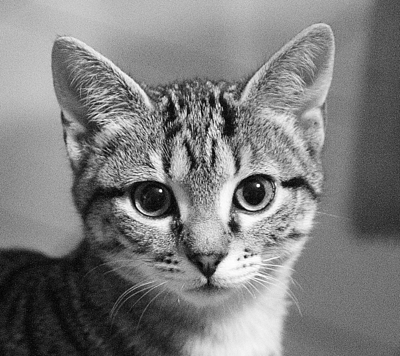

In [61]:
image_path, url, extension = ask_path()
im = Image.open(image_path)
image_info(im, image_path)
im = change_res(im)
im = change_filter(im)
im.save(url + "_new" + extension)
im
